<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-Project-in-CNN-Using-Colab/blob/main/Fish_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [4]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory('/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',target_size=(128,128),batch_size=32,class_mode= 'categorical')
test_fed = rescaled.flow_from_directory('/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [10]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/my_model.hdf5',monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 2,factor = 0.1)

In [11]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=5, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-11-fc06ed9bd5b3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=5, validation_data=test_fed,
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
150/150 - 2097s - loss: 2.0727 - accuracy: 0.4823 - val_loss: 0.7545 - val_accuracy: 0.7217 - lr: 0.0010 - 2097s/epoch - 14s/step
Epoch 2/5
150/150 - 118s - loss: 0.6675 - accuracy: 0.7177 - val_loss: 0.7725 - val_accuracy: 0.7142 - lr: 0.0010 - 118s/epoch - 787ms/step
Epoch 3/5
150/150 - 115s - loss: 0.4886 - accuracy: 0.8227 - val_loss: 0.4475 - val_accuracy: 0.8633 - lr: 0.0010 - 115s/epoch - 766ms/step
Epoch 4/5
150/150 - 119s - loss: 0.3484 - accuracy: 0.8777 - val_loss: 0.4003 - val_accuracy: 0.8475 - lr: 0.0010 - 119s/epoch - 795ms/step
Epoch 5/5
150/150 - 115s - loss: 0.2381 - accuracy: 0.9144 - val_loss: 0.2854 - val_accuracy: 0.8900 - lr: 0.0010 - 115s/epoch - 769ms/step


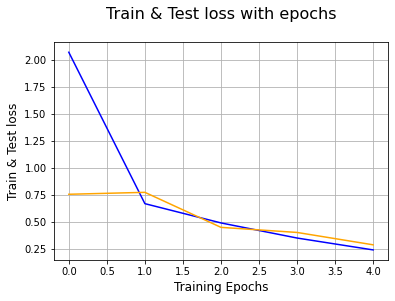

In [12]:
plt.plot(hist.history['loss'],color = 'blue',label = 'train')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

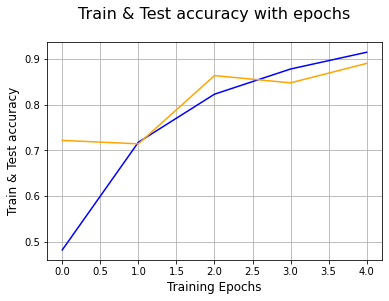

In [13]:
plt.plot(hist.history['accuracy'],color = 'blue',label = 'train')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [14]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 15s - loss: 0.2854 - accuracy: 0.8900 - 15s/epoch - 392ms/step
89.00
